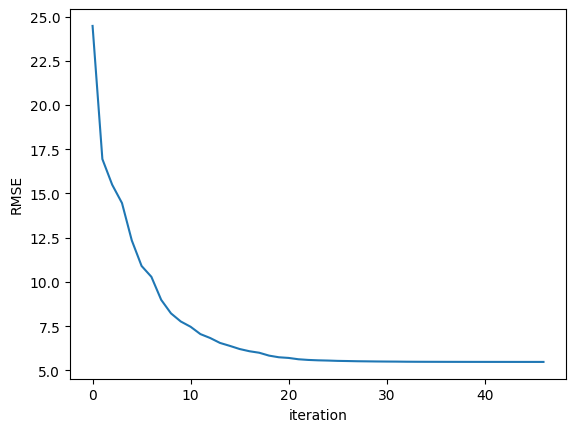

Stopping criteria epsilon = 100.0
w = ( 4.796343230179786 ,  -0.6465223337268758 )
b =  0.6444002368323888
RMSE =  5.478044811689087 
interation count =  47 
test RMSE =  5.720380244436701


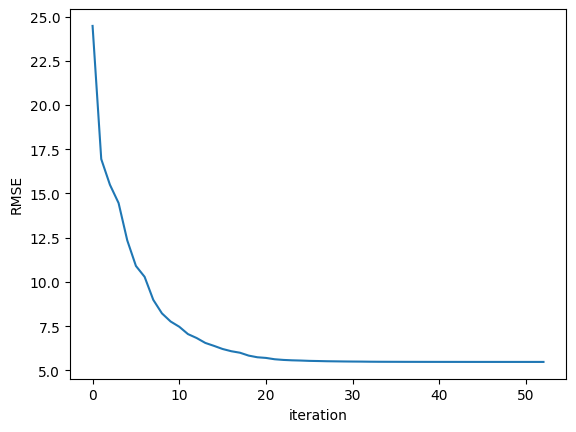

Stopping criteria epsilon = 50.0
w = ( 4.804004906000841 ,  -0.648650705605677 )
b =  0.6444624286963528
RMSE =  5.477743553170078 
interation count =  53 
test RMSE =  5.7207321032612874


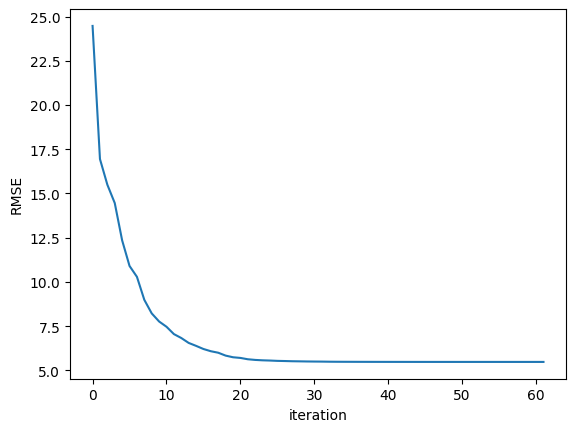

Stopping criteria epsilon = 20.0
w = ( 4.810039038975083 ,  -0.6510500380006713 )
b =  0.64350030757248
RMSE =  5.477646193912167 
interation count =  62 
test RMSE =  5.719946792330909


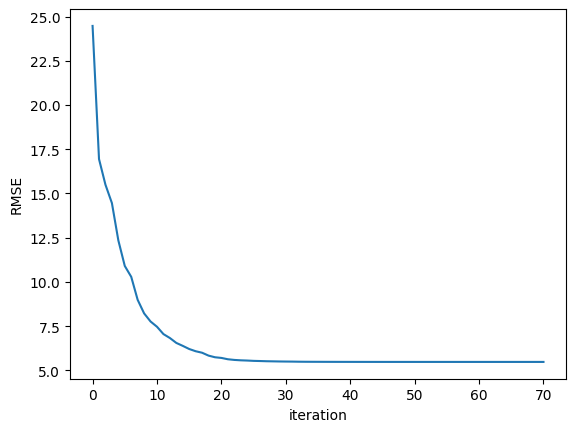

Stopping criteria epsilon = 10.0
w = ( 4.8119438602754965 ,  -0.6517315070130439 )
b =  0.6421028151532646
RMSE =  5.477630904919318 
interation count =  71 
test RMSE =  5.719739963756821


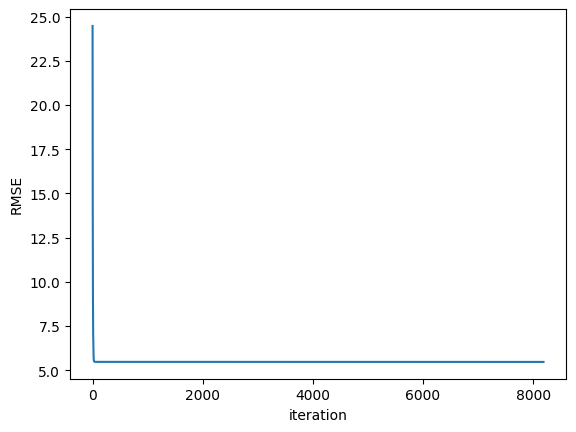

Stopping criteria epsilon = 5.0
w = ( 4.969200699333493 ,  -0.6406110194862527 )
b =  -0.49546152946528854
RMSE =  5.474522847880449 
interation count =  8189 
test RMSE =  5.722839365170058


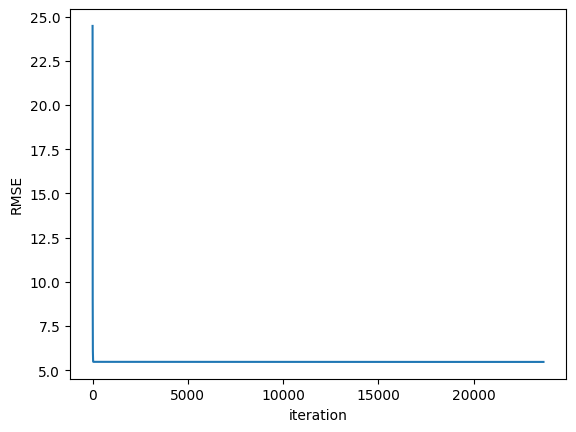

Stopping criteria epsilon = 2.0
w = ( 5.121204331149416 ,  -0.6293860874445593 )
b =  -1.600925991207373
RMSE =  5.472907641003454 
interation count =  23657 
test RMSE =  5.727237263357096


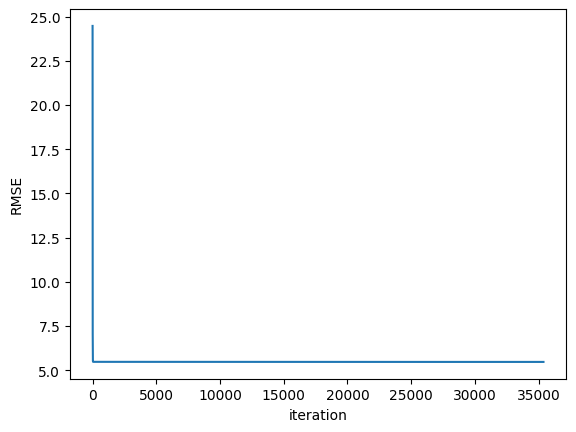

Stopping criteria epsilon = 1.0
w = ( 5.1719076755261755 ,  -0.6256617728173438 )
b =  -1.9697302941423125
RMSE =  5.4726768113959885 
interation count =  35377 
test RMSE =  5.728924923360803


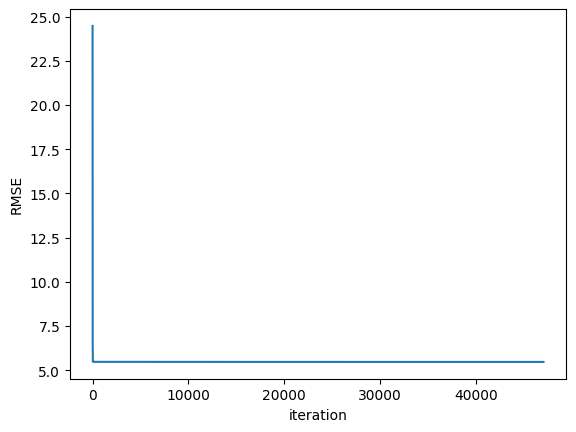

Stopping criteria epsilon = 0.5
w = ( 5.197172963241042 ,  -0.6237947578356479 )
b =  -2.153471414813229
RMSE =  5.472619342842536 
interation count =  47059 
test RMSE =  5.729831941102132


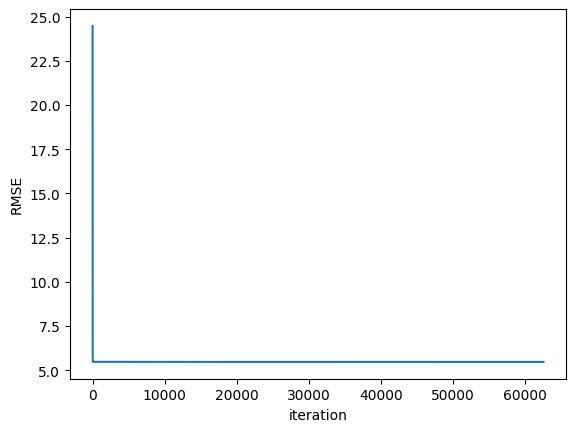

Stopping criteria epsilon = 0.2
w = ( 5.212350230480978 ,  -0.6226777005801225 )
b =  -2.263860778403384
RMSE =  5.4726032170401195 
interation count =  62509 
test RMSE =  5.730384472512413


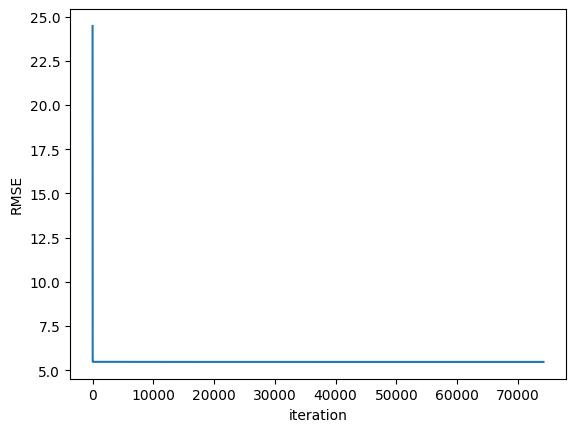

Stopping criteria epsilon = 0.1
w = ( 5.2174109834634965 ,  -0.6223059671817716 )
b =  -2.300671498727752
RMSE =  5.47260091047178 
interation count =  74191 
test RMSE =  5.730570005245047


In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

df = pd.read_csv('boston.csv')
# X1 = np.array(df[["indus", "nox", "rm", "ptratio", "lstat"]].values)
X1 = np.array(df[["rm", "lstat"]].values)
y1 = np.array(df["medv"].values) 
n1 = len(y1)
y1 = y1.reshape(n1,1)
bias = np.array([[1]]*n1)
X1 = np.concatenate((bias,X1),axis = 1)

n = int(n1*0.8)
n2 = n1 - n
random_index = [i for i in range(n1)]
np.random.shuffle(random_index)
X = np.array([X1[i] for i in random_index[:n]])
y = np.array([y1[i] for i in random_index[:n]])
testX = np.array([X1[i] for i in random_index[n:]])
testy = np.array([y1[i] for i in random_index[n:]])

def calculate_J(X, y, w):
    return np.dot(np.transpose(np.dot(X,w)-y),np.dot(X,w)-y)

def calculate_derivative(X, y, w):
    return np.dot(np.dot(np.transpose(X),X),w)-np.dot(np.transpose(X),y)

def backtrack(w):
    alpha = 0.5
    t = 0.5
    d = -calculate_derivative(X, y, w)
    while calculate_J(X, y, w + alpha*d) > calculate_J(X, y, w) - alpha*np.dot(np.transpose(d),d):
        alpha = t*alpha
    return w + alpha * d

def calculate_loss(X, y, w, nc):
    return math.sqrt(calculate_J(X, y, w)/nc)

for epsilon in [1000, 500, 200, 100, 50, 20, 10, 5, 2, 1]:
    w = np.array([[0], [0], [0]]) #initialize w_0
    count = 0
    loss_list = []
    while np.linalg.norm(calculate_derivative(X, y, w)) > epsilon*0.1 and count <= 10**6:
        count += 1
        loss_list.append(calculate_loss(X, y, w, n))
        w = backtrack(w)
    plt.plot(loss_list)
    plt.xlabel("iteration")
    plt.ylabel("RMSE")
    plt.show()
    print("Stopping criteria epsilon =", epsilon*0.1)
    print("w = (", w[1][0], ", ", w[2][0], ")")
    print("b = ", w[0][0])
    print("RMSE = ", loss_list[-1],"\ninteration count = ", count, "\ntest RMSE = ", calculate_loss(testX, testy, w, n2))

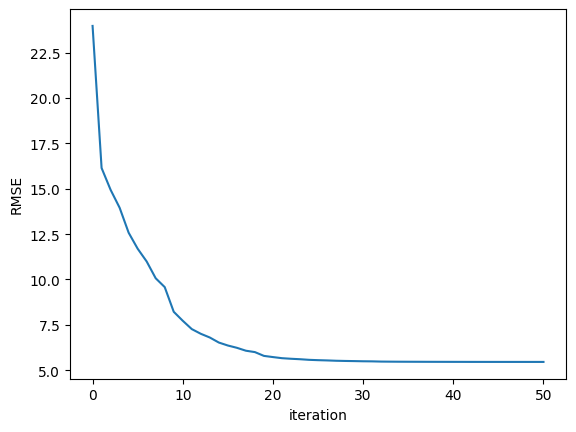

Stopping criteria epsilon = 100.0
w = ( 4.709566060905197 ,  -0.6135682969351003 )
b =  0.652972228995546
RMSE =  5.458414697644044 
interation count =  51 
test RMSE =  5.984477893129354


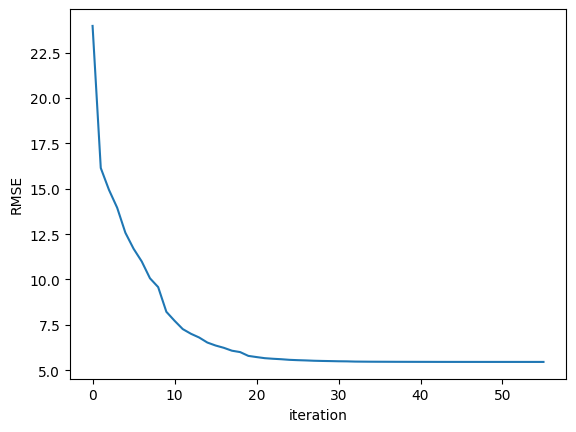

Stopping criteria epsilon = 50.0
w = ( 4.717522646790974 ,  -0.6166950384254072 )
b =  0.6544684634794065
RMSE =  5.458152069554203 
interation count =  56 
test RMSE =  5.973837618708739


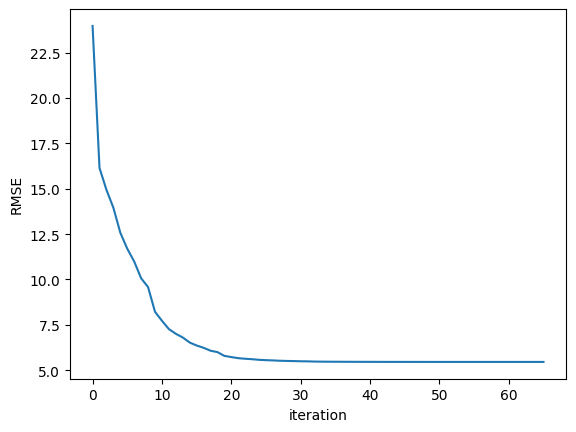

Stopping criteria epsilon = 20.0
w = ( 4.72318676947495 ,  -0.6190570822119598 )
b =  0.6559734342867011
RMSE =  5.458063781440969 
interation count =  66 
test RMSE =  5.9660365526055426


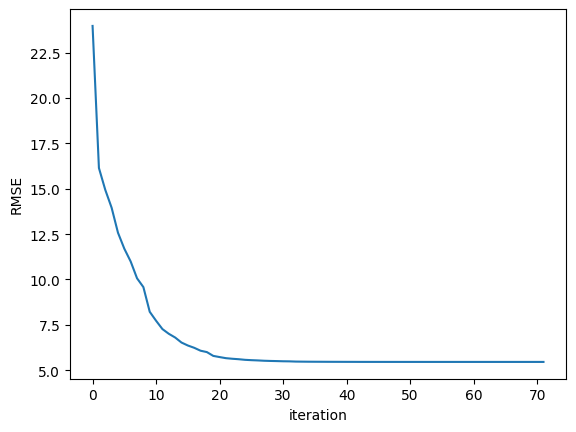

Stopping criteria epsilon = 10.0
w = ( 4.724333463292474 ,  -0.619544032668872 )
b =  0.6565225894440219
RMSE =  5.458055737438195 
interation count =  72 
test RMSE =  5.96444177576396


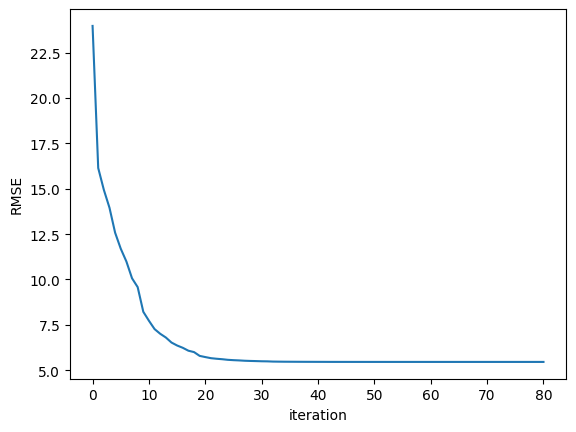

Stopping criteria epsilon = 5.0
w = ( 4.725109473960877 ,  -0.6199370177503597 )
b =  0.657217991851031
RMSE =  5.458052458303954 
interation count =  81 
test RMSE =  5.963218303589406


In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

df = pd.read_csv('boston.csv')
# X1 = np.array(df[["indus", "nox", "rm", "ptratio", "lstat"]].values)
X1 = np.array(df[["rm", "lstat"]].values)
y1 = np.array(df["medv"].values) 
n1 = len(y1)
y1 = y1.reshape(n1,1)
bias = np.array([[1]]*n1)
X1 = np.concatenate((bias,X1),axis = 1)

n = int(n1*0.85)
n2 = n1 - n
random_index = [i for i in range(n1)]
np.random.shuffle(random_index)
X = np.array([X1[i] for i in random_index[:n]])
y = np.array([y1[i] for i in random_index[:n]])
testX = np.array([X1[i] for i in random_index[n:]])
testy = np.array([y1[i] for i in random_index[n:]])

def calculate_J(X, y, w):
    return np.dot(np.transpose(np.dot(X,w)-y),np.dot(X,w)-y)

def calculate_derivative(X, y, w):
    return np.dot(np.dot(np.transpose(X),X),w)-np.dot(np.transpose(X),y)

def backtrack(w):
    alpha = 0.5
    t = 0.5
    d = -calculate_derivative(X, y, w)
    while calculate_J(X, y, w + alpha*d) > calculate_J(X, y, w) - alpha*np.dot(np.transpose(d),d):
        alpha = t*alpha
    return w + alpha * d

def calculate_loss(X, y, w, nc):
    return math.sqrt(calculate_J(X, y, w)/nc)

for epsilon in [1000, 500, 200, 100, 50]:
    w = np.array([[0], [0], [0]]) #initialize w_0
    count = 0
    loss_list = []
    while np.linalg.norm(calculate_derivative(X, y, w)) > epsilon*0.1 and count <= 10**6:
        count += 1
        loss_list.append(calculate_loss(X, y, w, n))
        w = backtrack(w)
    plt.plot(loss_list)
    plt.xlabel("iteration")
    plt.ylabel("RMSE")
    plt.show()
    print("Stopping criteria epsilon =", epsilon*0.1)
    print("w = (", w[1][0], ", ", w[2][0], ")")
    print("b = ", w[0][0])
    print("RMSE = ", loss_list[-1],"\ninteration count = ", count, "\ntest RMSE = ", calculate_loss(testX, testy, w, n2))